Evaluation Criteria
Submissions are evaluated based on the F1 Score calculated using the predicted value of your model and true value of of Survived_1_year on the unseen new test dataset mentioned under submission guidelines.

Basic Steps That You May Follow
The steps mentioned here are basic steps to get you started to solve the problem. You are free to use some techniques other than mentioned below to improve your model performance.

Load the necessary libraries such as pandas, numpy, scikit-learn and more if any
Load your dataset and perform exploratory data analysis to identify any patterns in the dataset
You may fill mssing values if any (use mode for categorical column and mean/median for numerical columns). If there are no missing values, you may skip this step. Perform any other data preprocessing step that you think is required.
Separate Input Variables and Target variable
Split the dataset pharma_data into train set and test set. Now what is this pharma_data? - don't worry, just scroll up to dataset section above, we have declared the name of our dataset as pharma_data.
Build a Model (You have to decide which model to use)
Predict the target variable for your own test dataset created in step 5 and check the model performance.
Not happy with your model performance? It is alright, you can try to optimise the model further to improve the performance of your model.
Now, use your model on the test_new dataset mentioned in the "Submission Guidelines" section below. You need to predict whether a patient survived after 1 year of treatment (Survived_1_year == 1) or did not survive after 1 year of treatment (Survived_1_year == 0) based on the clinical and demographic features mentioned in the dataset.
Once you submit your predictions in prescribed format given under "Submission Guidelines" section, you will get a score based on your model performance.
Want to improve your score? Optimise your model, generate new predictions and submit them again.
Submission Guidelines

Load the new unseen test data (name it as 'test_new'). You can load the data using the below command.
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
Here the Survived_1_year column is deliberately not there as you need to predict it.

With the model you have built from the earlier section, predict the target variable Survived_1_year on the new unseen test data that you loaded in step 1. Store the predicted values in a variable Survived_1_year
Save prediction result using the guidelines given under "how to save prediction file?" section.
Submission: Go to solve tab and submit your predicted values for Survived_1_year variable. The predicted values for Survived_1_year must be put in comma separated inside the square brackets of the following command prediction = []. Once done, click on 'run' button to get your result. Further, if you want to get your rank, click on the small submission icon which is in the form of tick mark. Follow the detailed instructional video uploaded earlier here: https://www.youtube.com/watch?v=XC3ZxHq5s9I.
How to save prediction file?
Please follow the steps given here: https://colab.research.google.com/drive/1E5hL-J0-SaFkSHpsmB1UaIbCyned0yu0?usp=sharing#scrollTo=GvSTtB9QOYB-

In [1]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Data Description:

ID_Patient_Care_Situation: Care situation of a patient during treatment
    
Diagnosed_Condition: The diagnosed condition of the patient
    
ID_Patient: Patient identifier number
    
Treatment_with_drugs: Class of drugs used during treatment
    
Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
    
Patient_Age: Age of the patient
    
Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
    
Patient_Smoker: If the patient was a smoker or not
    
Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
    
Previous_Condition: Condition of the patient before the start of the treatment 
( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. 
 A, B, C, D, E, F and Z are the previous conditions of the patient. 
 Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. 
 If the patient didn't have that condition, it is 0 and same for other conditions. 
 If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively
 while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. 
 The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

Feel free to google 'Diagnose' and 'Body Mass Index' if you don't know about these terms.

In [3]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [4]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [6]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [7]:
#Not required
ID_Patient_Care_Situation, Patient_ID, A	B	C	D	E	F	Z


In [8]:
pharma_data.drop(columns = ['ID_Patient_Care_Situation', 'Patient_ID','A','B','C','D','E','F','Z'], inplace=True)

In [9]:
pharma_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,Number_of_prev_cond,Survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,Stable,2.0,0
1,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,1
2,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0
3,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,1
4,0,NaN,128,1.348400,Cannot say,RURAL,Stable,1.0,1


In [10]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       23097 non-null  int64  
 1   Treated_with_drugs        23084 non-null  object 
 2   Patient_Age               23097 non-null  int64  
 3   Patient_Body_Mass_Index   23097 non-null  float64
 4   Patient_Smoker            23097 non-null  object 
 5   Patient_Rural_Urban       23097 non-null  object 
 6   Patient_mental_condition  23097 non-null  object 
 7   Number_of_prev_cond       21862 non-null  float64
 8   Survived_1_year           23097 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.6+ MB


In [15]:
pharma_data['Treated_with_drugs'].nunique()

32

In [17]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].astype('category')

In [20]:
pharma_data['Patient_Smoker'].nunique()

3

In [21]:
pharma_data['Patient_Rural_Urban'].nunique()

2

In [22]:
pharma_data['Patient_mental_condition'].nunique()

1

In [23]:
pharma_data['Patient_Smoker'] = pharma_data['Patient_Smoker'].astype('category')
pharma_data['Patient_Rural_Urban'] = pharma_data['Patient_Rural_Urban'].astype('category')
pharma_data['Patient_mental_condition'] = pharma_data['Patient_mental_condition'].astype('category')

In [24]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Diagnosed_Condition       23097 non-null  int64   
 1   Treated_with_drugs        23084 non-null  category
 2   Patient_Age               23097 non-null  int64   
 3   Patient_Body_Mass_Index   23097 non-null  float64 
 4   Patient_Smoker            23097 non-null  category
 5   Patient_Rural_Urban       23097 non-null  category
 6   Patient_mental_condition  23097 non-null  category
 7   Number_of_prev_cond       21862 non-null  float64 
 8   Survived_1_year           23097 non-null  int64   
dtypes: category(4), float64(2), int64(3)
memory usage: 994.4 KB


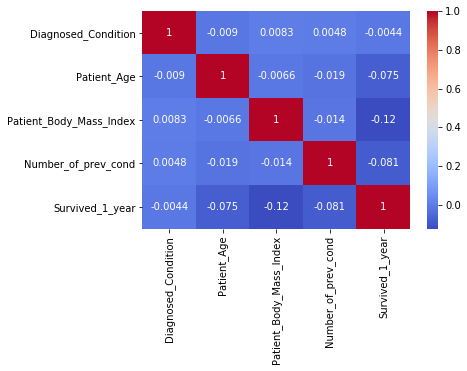

In [27]:
sns.heatmap(pharma_data.corr(), annot= True, cmap= 'coolwarm')

In [31]:
pharma_data.columns.values

array(['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Age',
       'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban',
       'Patient_mental_condition', 'Number_of_prev_cond',
       'Survived_1_year'], dtype=object)

In [34]:
pharma_data['Treated_with_drugs'].isnull().sum()

13

In [40]:
pharma_data['Number_of_prev_cond'].isnull().sum()

1235

In [50]:
pharma_data['Number_of_prev_cond'].median()

2.0

In [51]:
pharma_data['Number_of_prev_cond'].fillna(pharma_data['Number_of_prev_cond'].median(), inplace=True)

In [52]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Diagnosed_Condition       23097 non-null  int64   
 1   Treated_with_drugs        23084 non-null  category
 2   Patient_Age               23097 non-null  int64   
 3   Patient_Body_Mass_Index   23097 non-null  float64 
 4   Patient_Smoker            23097 non-null  category
 5   Patient_Rural_Urban       23097 non-null  category
 6   Patient_mental_condition  23097 non-null  category
 7   Number_of_prev_cond       23097 non-null  float64 
 8   Survived_1_year           23097 non-null  int64   
dtypes: category(4), float64(2), int64(3)
memory usage: 994.4 KB


In [61]:
pharma_data['Treated_with_drugs'].mode()[0]

'DX6'

In [62]:
pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0], inplace=True)

In [63]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Diagnosed_Condition       23097 non-null  int64   
 1   Treated_with_drugs        23097 non-null  category
 2   Patient_Age               23097 non-null  int64   
 3   Patient_Body_Mass_Index   23097 non-null  float64 
 4   Patient_Smoker            23097 non-null  category
 5   Patient_Rural_Urban       23097 non-null  category
 6   Patient_mental_condition  23097 non-null  category
 7   Number_of_prev_cond       23097 non-null  float64 
 8   Survived_1_year           23097 non-null  int64   
dtypes: category(4), float64(2), int64(3)
memory usage: 994.4 KB


In [58]:
pharma_data['Treated_with_drugs'].head()

0     DX6
1    DX2 
2     DX6
3    DX1 
4     NaN
Name: Treated_with_drugs, dtype: category
Categories (32, object): [DX1, DX1 DX2, DX1 DX2 DX3, DX1 DX2 DX3 DX4, ..., DX4, DX4 DX5, DX5, DX6]

In [64]:
X = pharma_data.drop(['Survived_1_year'],axis = 1)
y = pharma_data['Survived_1_year']

In [30]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,Number_of_prev_cond
4015,2,DX6,20,19.312457,NO,RURAL,Stable,1.0
4453,36,DX2,32,26.580993,YES,URBAN,Stable,2.0
8842,6,DX6,15,26.132668,YES,RURAL,Stable,1.0
7660,9,DX6,3,24.952266,NO,RURAL,Stable,4.0
11660,36,DX2 DX4,16,19.745228,YES,RURAL,Stable,3.0


In [68]:
pharma_data['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [70]:
pharma_data.drop(columns = ['Treated_with_drugs'], inplace=True)

In [71]:
#pharma_data.drop(columns = ['Patient_mental_condition'], inplace=True)
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,YES,URBAN,2.0,0
1,5,36,22.945566,YES,RURAL,1.0,1
2,23,48,27.510027,YES,RURAL,1.0,0
3,51,5,19.130976,NO,URBAN,1.0,1
4,0,128,1.348400,Cannot say,RURAL,1.0,1


In [72]:
pharma_data['Patient_Rural_Urban'].value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [75]:
pharma_data['Patient_Smoker'].value_counts()

NO            13246
YES            9838
Cannot say        0
Name: Patient_Smoker, dtype: int64

In [74]:
pharma_data.drop(pharma_data[pharma_data['Patient_Smoker'] == 'Cannot say'].index, inplace = True) 


In [78]:
pharma_data['Patient_Smoker']

0        YES
1        YES
2        YES
3         NO
5        YES
        ... 
23092     NO
23093     NO
23094    YES
23095    YES
23096    YES
Name: Patient_Smoker, Length: 23084, dtype: category
Categories (3, object): [Cannot say, NO, YES]

In [ ]:
#sampleDF['housing'] = sampleDF['housing'].map({'yes': 1, 'no': 0})

In [81]:
pharma_data['Patient_Rural_Urban'] = pharma_data['Patient_Rural_Urban'].map({'RURAL':0, "URBAN":1})
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,YES,1,2.0,0
1,5,36,22.945566,YES,0,1.0,1
2,23,48,27.510027,YES,0,1.0,0
3,51,5,19.130976,NO,1,1.0,1
5,45,47,26.155120,YES,1,1.0,0


In [82]:
pharma_data['Patient_Smoker'] = pharma_data['Patient_Smoker'].map({'YES':1, "NO":0})
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,1.0,1,2.0,0
1,5,36,22.945566,1.0,0,1.0,1
2,23,48,27.510027,1.0,0,1.0,0
3,51,5,19.130976,0.0,1,1.0,1
5,45,47,26.155120,1.0,1,1.0,0


In [87]:
X = pharma_data.drop(['Survived_1_year'],axis = 1)
y = pharma_data['Survived_1_year']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Number_of_prev_cond
5847,13,64,22.306807,1.0,1,1.0
5749,38,52,28.276782,0.0,1,2.0
15399,5,59,28.397046,1.0,0,2.0
8530,27,62,27.194177,1.0,0,1.0
6554,23,9,29.855093,0.0,0,1.0


In [93]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

71.37


In [91]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

69.98


In [94]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

69.72


In [95]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

63.31


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [96]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

67.94


In [97]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

74.7


In [98]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

69.29


In [101]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_linear_svc, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,74.70
4,Naive Bayes,71.37
2,Logistic Regression,69.98
0,Support Vector Machines,69.72
1,KNN,69.29
6,Decision Tree,67.94
5,Linear SVC,63.31


In [105]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

74.72


In [106]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1005  690]
 [ 477 2445]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      1695
           1       0.78      0.84      0.81      2922

    accuracy                           0.75      4617
   macro avg       0.73      0.71      0.72      4617
weighted avg       0.74      0.75      0.74      4617

0.7472384665367121


In [107]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [108]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
pharma_data.columns

Index(['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [111]:
test_new = test_new.drop(columns=['ID_Patient_Care_Situation', 'Patient_ID', 'Treated_with_drugs', 'Patient_mental_condition',
                                 'A','B','C','D','E','F','Z' ],axis=1)

In [112]:
test_new.columns

Index(['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Number_of_prev_cond'],
      dtype='object')

In [113]:
test_new.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Number_of_prev_cond
0,40,16,29.443894,NO,RURAL,2.0
1,52,24,26.836321,NO,URBAN,2.0
2,50,63,25.523280,NO,RURAL,2.0
3,32,42,27.171155,NO,URBAN,3.0
4,20,50,25.556192,NO,RURAL,1.0


In [114]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      9303 non-null   int64  
 1   Patient_Age              9303 non-null   int64  
 2   Patient_Body_Mass_Index  9303 non-null   float64
 3   Patient_Smoker           9303 non-null   object 
 4   Patient_Rural_Urban      9303 non-null   object 
 5   Number_of_prev_cond      9303 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 436.2+ KB


In [116]:
test_new.drop(test_new[test_new['Patient_Smoker'] == 'Cannot say'].index, inplace = True) 

In [117]:
test_new['Patient_Rural_Urban'] = test_new['Patient_Rural_Urban'].map({'RURAL':0, "URBAN":1})
test_new['Patient_Smoker'] = test_new['Patient_Smoker'].map({'YES':1, "NO":0})

In [118]:
test_new.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Number_of_prev_cond
0,40,16,29.443894,0,0,2.0
1,52,24,26.836321,0,1,2.0
2,50,63,25.523280,0,0,2.0
3,32,42,27.171155,0,1,3.0
4,20,50,25.556192,0,0,1.0


In [119]:
y_pred = randomforest.predict(test_new)

In [120]:
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [121]:
res = pd.DataFrame(y_pred)
res.index = test_new.index
res.columns = ['Survived_1_year']
res.to_csv("Survived_1_year.csv")

In [122]:
X = test_new
y = res

In [128]:
y

,Survived_1_year
0,1
1,1
2,1
3,0
4,1
...,...
9298,1
9299,1
9300,1
9301,0


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


89.52
[[ 501  103]
 [  92 1165]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       604
           1       0.92      0.93      0.92      1257

    accuracy                           0.90      1861
   macro avg       0.88      0.88      0.88      1861
weighted avg       0.89      0.90      0.89      1861

0.8952176249328319
